In [1]:
import numpy as np
from scipy.fftpack import dct, idct

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from music21 import converter
matplotlib.style.use('styles.mplstyle')

from helpers import cm2inch, title

## Complex roots of unity

In [2]:
def omega(N, n):
    return np.exp(n * 2*np.pi*(0+1j) / N)

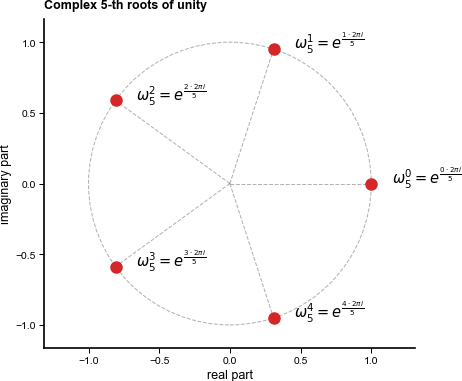

In [3]:
N = 5
roots = np.array([ omega(N, k) for k in range(N)])

plt.figure(figsize=cm2inch(8.2, 7))
circle = plt.Circle((0,0), 1, ec='.7', fc='w', ls='--', lw=.5)
plt.gca().add_artist(circle)

for k, r in enumerate(roots):
    x, y = np.real(r), np.imag(r)
    plt.plot([0, x], [0, y], 'k--', lw=.5, alpha=.3)
    plt.plot(x, y, 'o', c='C3', ms=5)
    plt.annotate(f'$\omega_{N}^{k} = e^\\frac{{{k} \cdot 2\pi i}}{{{N}}}$', 
                 xy=(x,y), xytext=(10,0), textcoords='offset points')

    
plt.axis('equal');
plt.xlim(-1.4, 1.4)
plt.ylim(-1.4, 1.4)
plt.ylabel('imaginary part')
plt.xlabel('real part')
title(f'Complex {N}-th roots of unity')
plt.tight_layout()
plt.savefig('../figures/suppl-S3/fig-roots-of-unity.pdf')

## Cosine eigenvectors

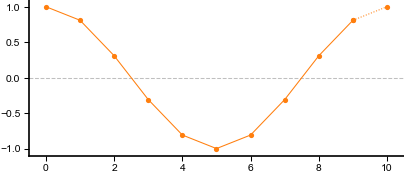

In [4]:
def show_eigenvector(N, n):
    colors = ['.5'] + [f'C{i}' for i in range(9)]
    cos = lambda xs: np.cos(xs * np.pi * n / N)
    xs = np.arange(0, N)
    plt.plot(xs, cos(xs), '.-', lw=.5, c=colors[n])

    xs = np.array([N-1, N])
    plt.plot(xs, cos(xs), '.:', c=colors[n], lw=.5)
    
    plt.axhline(0, ls='--', c='.75', zorder=-1, lw=.5)

plt.figure(figsize=cm2inch(8.2, 3.5))
show_eigenvector(10, 2)

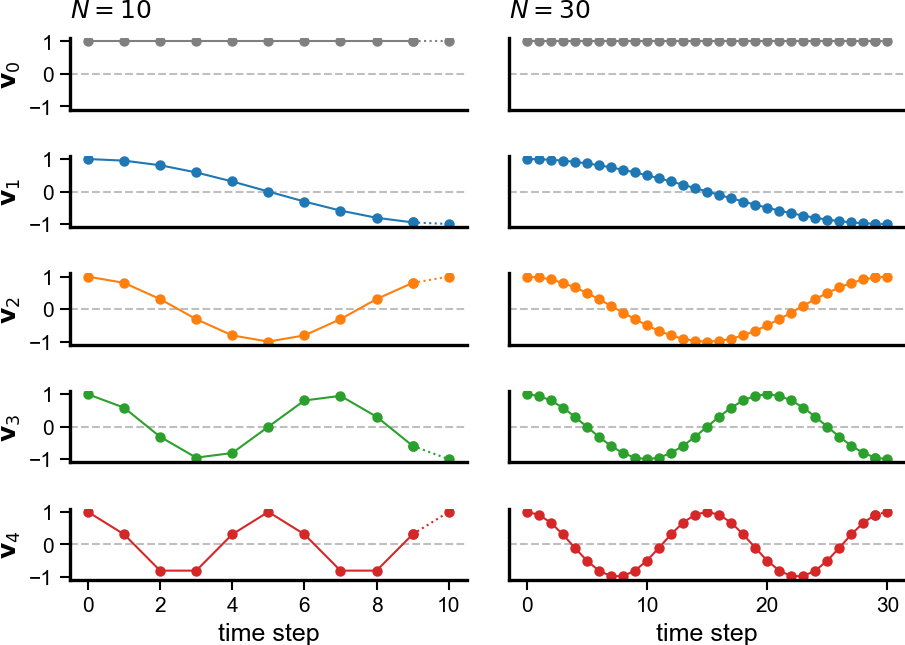

In [5]:
fig = plt.figure(figsize=cm2inch(8.2, 6), tight_layout=True)
max_n = 5
gs = gridspec.GridSpec(max_n, 2)

for n in range(max_n):
    fig.add_subplot(gs[n, 0])
    show_eigenvector(10, n)
    plt.ylim(-1.1, 1.1)
    plt.ylabel(f'$\mathbf{{v}}_{n}$')

    if n < max_n-1: plt.xticks([])
    if n == 0: title('$N = 10$')
    if n == max_n - 1: plt.xlabel('time step')
        
for n in range(max_n):
    fig.add_subplot(gs[n, 1])
    show_eigenvector(30, n)
    plt.yticks([])
    plt.ylim(-1.1, 1.1)

    if n < max_n-1: plt.xticks([])
    if n == 0: title('$N = 30$')
    if n == max_n - 1: plt.xlabel('time step')

plt.tight_layout(pad=0)
plt.savefig('../figures/suppl-S3/fig-cosines.pdf')

## Autoregressive process AR(1)

We look at the (unnormalized) autocovariance matrix
\begin{align}
[\Psi(\rho)]_{ij} := \rho^{|j-i|}
\end{align}
from Ahmed et al (1974). These are Toeplitz matrices

In [6]:
def get_psi(N, rho):
    psi = np.eye(N)
    for i, j in zip(*np.triu_indices(N)):
        psi[i, j] = rho**(j-i)
        psi[j, i] = rho**(j-i)
    return psi

# get_psi(5, .99)

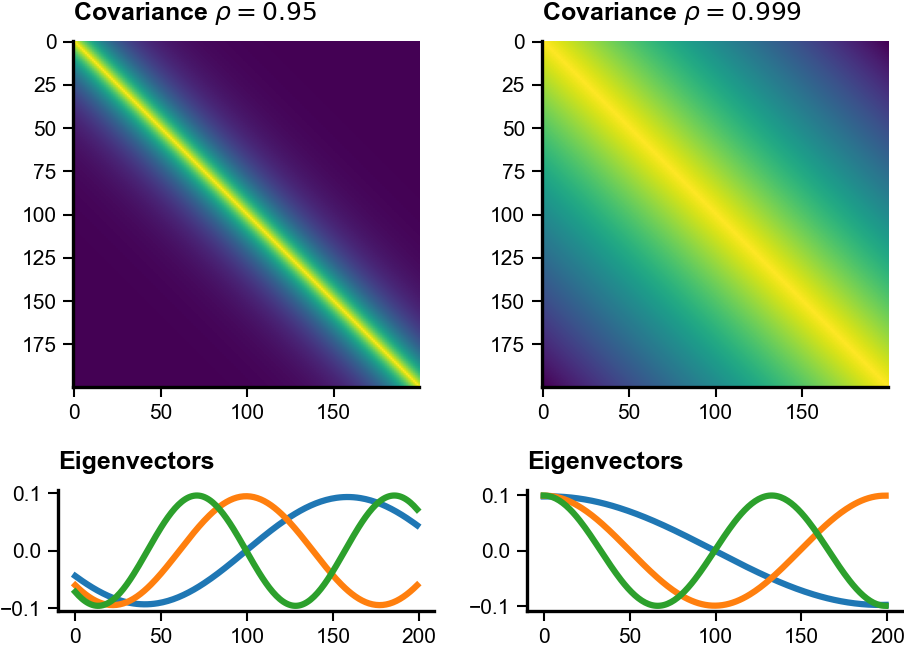

In [7]:
fig = plt.figure(figsize=cm2inch(8.2, 6))
gs = gridspec.GridSpec(3, 2)

def show_col(col, rho, N=200):
    ax1 = fig.add_subplot(gs[:2, col])
    psi = get_psi(N, rho)
    plt.imshow(psi)
    title(f'Covariance $\\rho = {rho}$')    
    
    ax1 = fig.add_subplot(gs[2, col])
    lam, V = np.linalg.eig(psi)
    top_lambdas = lam.argsort()[::-1][1:4]
    plt.plot(V[:, top_lambdas])
    title('Eigenvectors')
    
# show_col(0, .1)
# show_col(1, .5)
show_col(0, .95)
show_col(1, .999)

plt.tight_layout()
plt.savefig('../figures/suppl-S3/fig-ar1.pdf')